In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import networkx as nx
import pandas as pd
import time
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [39]:
## reading data sets
karate = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/karate.gml', label='id')
dol = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/dolphin.gml', label='id')
jazz = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/jazz.gml', label='id')
jazz_u = jazz.to_undirected()

Karate


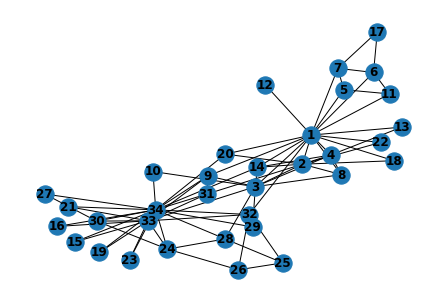

In [ ]:
print("Karate")
nx.draw(karate, with_labels=True, font_weight='bold')

Dolphin


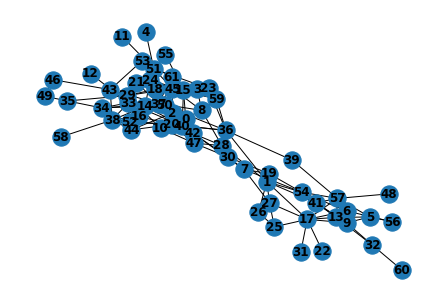

In [ ]:
print("Dolphin")
nx.draw(dol, with_labels=True, font_weight='bold')

Jazz


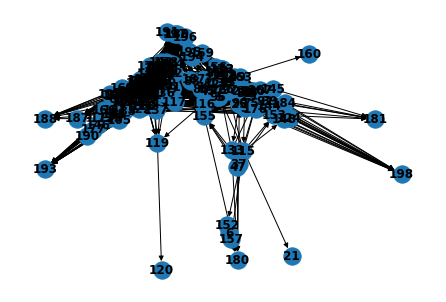

In [8]:
print("Jazz")
nx.draw(jazz, with_labels=True, font_weight='bold')

In [40]:
#Girvan Newman Algorithm#
def edge_to_remove(g):
  d1 = nx.edge_betweenness_centrality(g)
  list_of_tuples = list(d1.items())
    
  sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
    
  # Will return in the form (a,b)
  return list_of_tuples[0][0]
  
def girvan(g):
  a = nx.connected_components(g)
  lena = len(list(a))
  print (' The number of connected components are ', lena)
  while (lena == 1):
  
    # We need (a,b) instead of ((a,b))
    u, v = edge_to_remove(g)
    g.remove_edge(u, v) 
      
    a = nx.connected_components(g)
    lena=len(list(a))
    print (' The number of connected components are ', lena)
    for i in a:
      print (i)
      print ('.............')
  return a


In [44]:
def girvan_directed(g):
  a = nx.strongly_connected_components(g)
  lena = len(list(a))
  print (' The number of connected components are ', lena)
  while (lena == 1):
  
    # We need (a,b) instead of ((a,b))
    u, v = edge_to_remove(g)
    g.remove_edge(u, v) 
      
    a = nx.strongly_connected_components(g)
    print(a)
    lena=len(list(a))
    print (' The number of connected components are ', lena)
    for i in a:
      print (i)
      print ('.............')
  return a


In [ ]:
# Karate Club #
a = girvan(karate)
print ('Karate Club')
# print("---",len(list(a)))
for i in a:
    print (i.nodes())
    print ('.............')

 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  2
Karate Club


Karate


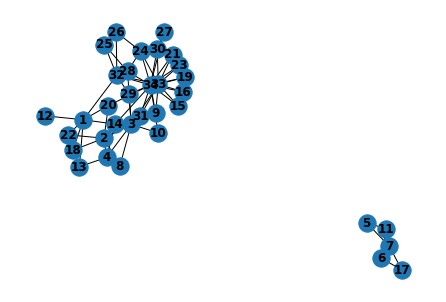

In [ ]:
print("Karate")
nx.draw(karate, with_labels=True, font_weight='bold')

In [ ]:
# Dolphin Network #
a = girvan(dol)

 The number of connected components are  2


Dolphin


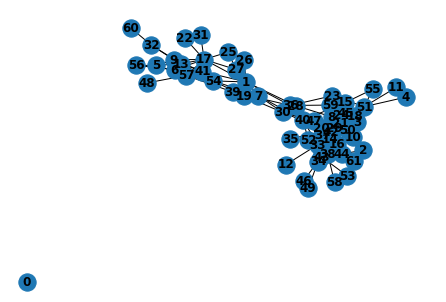

In [ ]:
print("Dolphin")
nx.draw(dol, with_labels=True, font_weight='bold')

In [42]:
####Jazz###
a = girvan(jazz_u)
print ('Jazz')

 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number

In [45]:
a = girvan_directed(jazz)
print ('Jazz')

 The number of connected components are  198
Jazz


Jazz


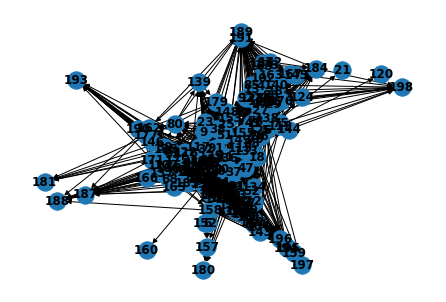

In [47]:
print("Jazz")
nx.draw(jazz, with_labels=True, font_weight='bold')

Jazz network undirected


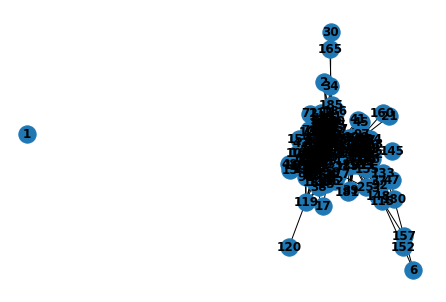

In [48]:
print("Jazz network undirected")
nx.draw(jazz_u, with_labels=True, font_weight='bold')

In [ ]:
!pip install python-modularity-maximization==0.0.1rc4

In [ ]:
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
import scipy.sparse.linalg

In [ ]:
karate_modularity_max = karate
comm_dict = partition(karate_modularity_max)

for comm in set(comm_dict.values()):
  min_max_communities = []
  print("Community %d"%comm)
  # print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))
  min_max_communities.append( [node for node in comm_dict if comm_dict[node] == comm])
  print(min_max_communities)

print('modularity-based clustering (modularity maximization) for karate is %.3f' % get_modularity(karate_modularity_max, comm_dict))

Community 3
[[24, 25, 26, 28, 29, 32]]
Community 4
[[9, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34]]
Community 5
[[1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22]]
Community 6
[[5, 6, 7, 11, 17]]
Calculating modularity for undirected graph
modularity-based clustering (modularity maximization) for karate is 0.419


In [ ]:
dolphin_modularity_max = dol
comm_dict = partition(dolphin_modularity_max)

for comm in set(comm_dict.values()):
  min_max_communities = []
  print("Community %d"%comm)
  # print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))
  min_max_communities.append( [node for node in comm_dict if comm_dict[node] == comm])
  print(min_max_communities)

print('modularity-based clustering (modularity maximization) for dolphin data set is %.3f' % get_modularity(dolphin_modularity_max, comm_dict))

Community 3
[[12, 14, 16, 20, 33, 34, 36, 37, 38, 40, 43, 44, 46, 49, 50, 52, 53, 58, 61]]
Community 4
[[3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55, 59]]
Community 5
[[1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60]]
Community 6
[[0, 2, 10, 28, 30, 42, 47]]
Calculating modularity for undirected graph
modularity-based clustering (modularity maximization) for dolphin data set is 0.526


In [ ]:
jazz_modularity_max = jazz
comm_dict = partition(jazz_modularity_max)

for comm in set(comm_dict.values()):
  min_max_communities = []
  print("Community %d"%comm)
  # print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))
  min_max_communities.append( [node for node in comm_dict if comm_dict[node] == comm])
  print(min_max_communities)

print('modularity-based clustering (modularity maximization) for Jazz data set is %.3f' % get_modularity(jazz_modularity_max, comm_dict))

Community 3
[[9, 59, 82, 84, 93, 94, 111, 116, 117, 118, 121, 125, 137, 143, 146, 175, 177, 183, 190, 193]]
Community 4
[[1, 8, 15, 16, 17, 20, 22, 23, 24, 32, 33, 35, 38, 40, 42, 43, 44, 46, 48, 50, 58, 60, 62, 63, 64, 65, 66, 68, 78, 80, 81, 91, 95, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 119, 120, 122, 123, 131, 132, 134, 135, 139, 154, 159, 162, 166, 168, 170, 171, 179, 182, 187, 188]]
Community 5
[[3, 4, 5, 6, 13, 18, 21, 25, 26, 27, 28, 29, 37, 39, 41, 45, 47, 51, 73, 75, 76, 77, 79, 85, 86, 88, 90, 92, 96, 97, 102, 115, 124, 126, 128, 133, 136, 138, 140, 144, 145, 147, 148, 149, 152, 153, 155, 156, 157, 160, 163, 167, 169, 172, 173, 176, 180, 181, 184, 189, 191, 198]]
Community 6
[[2, 7, 10, 11, 12, 14, 19, 30, 31, 34, 36, 49, 52, 53, 54, 55, 56, 57, 61, 67, 69, 70, 71, 72, 74, 83, 87, 89, 103, 112, 113, 114, 127, 129, 130, 141, 142, 150, 151, 158, 161, 164, 165, 174, 178, 185, 186, 192, 194, 195, 196, 197]]
Calculating modularity for directed graph
modularity-based

laplacian matrix:
[[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]
----labels_rbf---- [1 7 1 3 3 3 3 1 1 3 1 1 1 3 5 2 4 1 0 1 0 1 6 1 3 3 7 7 1 1 1 3 1 1]
Total runtime of the program is 0.19916224479675293


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend do

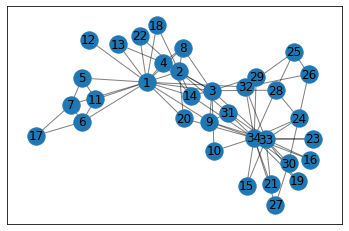

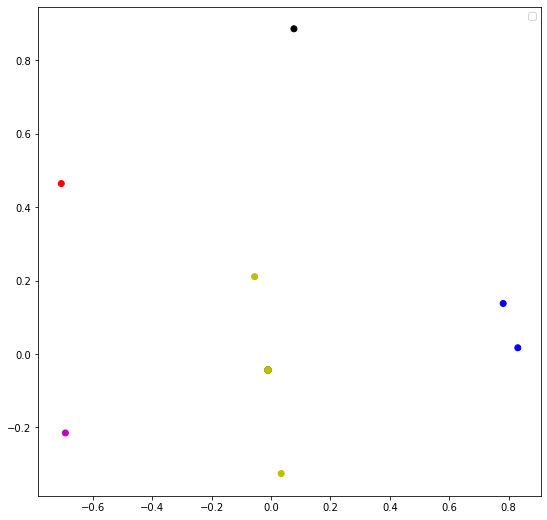

In [21]:
karate = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/karate.gml', label='id')
begin = time.time()

def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

draw_graph(karate)

###adjacency matrix
W = nx.adjacency_matrix(karate)
# print(W.todense())

###degree matrix

D = np.diag(np.sum(np.array(W.todense()), axis=1))
# print('degree matrix:')
# print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)


e, v = np.linalg.eig(L)
# eigenvalues
# print('eigenvalues:')
# print(e)
# # eigenvectors
# print('eigenvectors:')
# print(v)
i = np.where(e < 0.5)[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(v)
  
# Normalizing the karate
X_normalized = normalize(X_scaled)
  
X_normalized = pd.DataFrame(X_normalized)
  
#Reducing dimensions
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['C1', 'C2']

spectral_model_rbf = SpectralClustering()
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
print("----labels_rbf----",labels_rbf)
end = time.time()
print(f"Total runtime of the program is {end - begin}")

colr = {}
for l in labels_rbf:
    colr[l] = 'b'


colr = ['b','y','r','g','c','m','k','w']
# Build colour vector for data points
colr_vec = [colr[label] for label in labels_rbf]

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['C1'], X_principal['C2'], c = colr_vec)
plt.legend((colr_vec),('Label 0','Label 1','Label 3','Label 4','Label 5','Label 6','Label 7','Label 8'))
plt.show()

laplacian matrix:
[[ 6  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  4 ...  0  0 -1]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0 -1 ...  0  0  3]]
----labels_rbf---- [0 0 3 0 6 0 0 0 0 3 0 7 0 0 0 0 0 0 0 0 5 2 1 0 2 0 0 0 0 3 0 4 2 0 0 0 0
 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Total runtime of the program is 0.23563885688781738


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend do

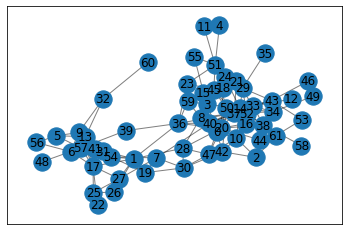

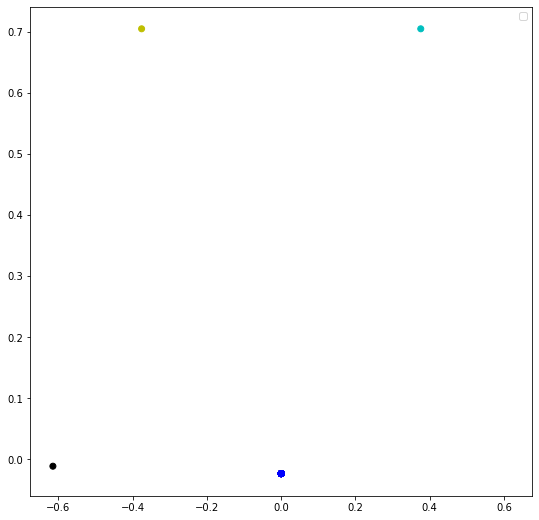

In [22]:
dolphin = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/dolphin.gml', label='id')
begin = time.time()

def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

draw_graph(dolphin)

###adjacency matrix
W = nx.adjacency_matrix(dolphin)
# print(W.todense())

###degree matrix

D = np.diag(np.sum(np.array(W.todense()), axis=1))
# print('degree matrix:')
# print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)


e, v = np.linalg.eig(L)
# eigenvalues
# print('eigenvalues:')
# print(e)
# # eigenvectors
# print('eigenvectors:')
# print(v)
i = np.where(e < 0.5)[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(v)
  
# Normalizing the karate
X_normalized = normalize(X_scaled)
  
X_normalized = pd.DataFrame(X_normalized)
  
#Reducing dimensions
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['C1', 'C2']

spectral_model_rbf = SpectralClustering()
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
print("----labels_rbf----",labels_rbf)
end = time.time()
print(f"Total runtime of the program is {end - begin}")

colr = {}
for l in labels_rbf:
    colr[l] = 'b'


colr = ['b','y','r','g','c','m','k','w']
# Build colour vector for data points
colr_vec = [colr[label] for label in labels_rbf]

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['C1'], X_principal['C2'], c = colr_vec)
plt.legend((colr_vec),('Label 0','Label 1','Label 3','Label 4','Label 5','Label 6','Label 7','Label 8'))
plt.show()

laplacian matrix:
[[23  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  1 -1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
----labels_rbf---- [6 1 0 0 0 6 1 6 6 6 6 6 0 6 6 6 6 6 6 6 1 1 6 1 6 0 6 0 0 6 1 6 6 1 1 1 0
 6 6 6 6 1 1 1 6 6 0 1 1 1 0 6 1 1 1 1 1 1 1 1 6 4 4 7 7 7 7 3 1 1 1 7 2 6
 0 0 5 3 2 6 4 6 1 1 5 5 4 2 1 5 6 0 3 3 4 2 0 4 4 4 4 5 3 6 4 1 1 4 4 7 3
 4 4 4 0 6 1 3 6 1 3 3 1 0 3 0 4 5 4 4 7 4 0 7 1 7 6 5 0 5 4 4 7 5 5 3 5 0
 2 4 3 6 0 3 5 5 0 4 7 1 7 1 5 7 1 3 5 3 5 4 3 5 5 7 3 5 3 7 2 0 0 7 3 5 4
 4 6 6 5 3 5 4 3 7 7 7 7 0]
Total runtime of the program is 4.310847759246826


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend does not support 'k' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: Legend do

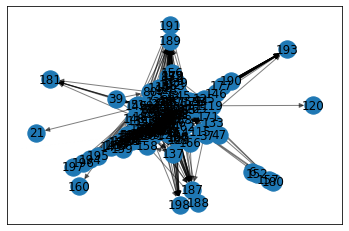

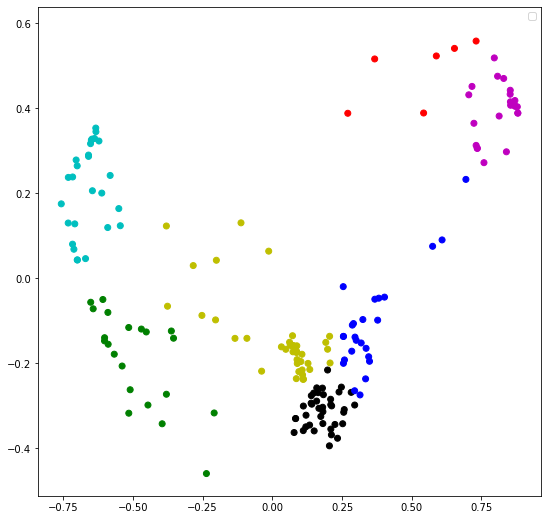

In [23]:
jazz = nx.read_gml('/content/drive/MyDrive/SEM 3/SMA Assignment/jazz.gml', label='id')
begin = time.time()

def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

draw_graph(jazz)

###adjacency matrix
W = nx.adjacency_matrix(jazz)
# print(W.todense())

###degree matrix

D = np.diag(np.sum(np.array(W.todense()), axis=1))
# print('degree matrix:')
# print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)


e, v = np.linalg.eig(L)
# eigenvalues
# print('eigenvalues:')
# print(e)
# # eigenvectors
# print('eigenvectors:')
# print(v)
i = np.where(e < 0.5)[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(v)
  
# Normalizing the karate
X_normalized = normalize(X_scaled)
  
X_normalized = pd.DataFrame(X_normalized)
  
#Reducing dimensions
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['C1', 'C2']

spectral_model_rbf = SpectralClustering()
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
print("----labels_rbf----",labels_rbf)
end = time.time()
print(f"Total runtime of the program is {end - begin}")

colr = {}
for l in labels_rbf:
    colr[l] = 'b'


colr = ['b','y','r','g','c','m','k','w']
# Build colour vector for data points
colr_vec = [colr[label] for label in labels_rbf]

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['C1'], X_principal['C2'], c = colr_vec)
plt.legend((colr_vec),('Label 0','Label 1','Label 3','Label 4','Label 5','Label 6','Label 7','Label 8'))
plt.show()